<a href="https://www.kaggle.com/hamedetezadi/traffic-signs?scriptVersionId=88414568" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# TRAFFIC SIGNS Classification USING **LE-NET** ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

 The dataset contains **43 different classes** of images as follows. 


    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
     **Year : 1998**


# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")
#Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally)
#...doesn’t warrant raising an exception and terminating the program.

In [2]:
# import libraries 
import pickle  # For more info read this: https://realpython.com/python-pickle-module/
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("../input/traffic-sign-classification/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("../input/traffic-sign-classification/test.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("../input/traffic-sign-classification/valid.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)
    
#Regrading the .p extension read this: https://file.org/extension/p
#The question is: do you know how two create a .p extension data set, if yes please comment
#that's why we import pickle to use serilization and unserilaization process

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

# STEP 2: IMAGE EXPLORATION

36

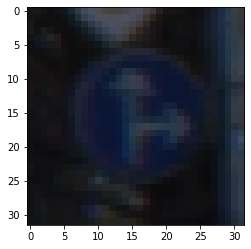

In [7]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled which means picuture from the same kind come after together in dataset
y_train[i]

# STEP 3: DATA PEPARATION

In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
# we shuffle the dataset because it decrease the overfitting while training process

In [9]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 
# we make the picture gray because this action will increase the speed of training process

In [10]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
#Same as gray comment!

In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

In [12]:
print(X_train_gray_norm.shape)
print(y_train.shape)

(34799, 32, 32, 1)
(34799,)


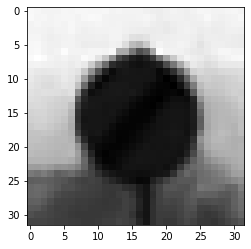

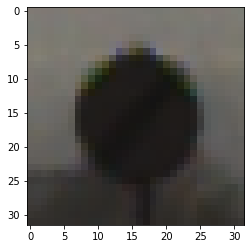

In [13]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


# STEP 4: MODEL TRAINING

**Steps and Layers: **

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - **Output = **(Input-filter+1)/Stride***** => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [14]:
# Import train_test_split from scikit library

from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard  #Read this: https://www.tensorflow.org/tensorboard

from sklearn.model_selection import train_test_split


In [15]:
image_shape = X_train_gray[i].shape

In [16]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))



User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

In [17]:
opt = keras.optimizers.Adam(learning_rate=0.01)
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics =['accuracy'])
# Please check the difference the following:  'categorical_crossentropy' vs 'sparse_categorical_crossentropy'
#'categorical_crossentropy' works on one-hot encoded target, while 'sparse_categorical_crossentropy' works on integer target.
#Read this: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [18]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=100,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

2022-02-21 19:37:26.149153: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
70/70 [==============================] - 4s 44ms/step - loss: 2.1864 - accuracy: 0.3970 - val_loss: 1.1550 - val_accuracy: 0.6782
Epoch 2/100
70/70 [==============================] - 2s 31ms/step - loss: 0.4992 - accuracy: 0.8507 - val_loss: 0.8260 - val_accuracy: 0.8214
Epoch 3/100
70/70 [==============================] - 2s 30ms/step - loss: 0.2594 - accuracy: 0.9274 - val_loss: 0.7467 - val_accuracy: 0.8470
Epoch 4/100
70/70 [==============================] - 2s 30ms/step - loss: 0.1751 - accuracy: 0.9502 - val_loss: 0.7635 - val_accuracy: 0.8656
Epoch 5/100
70/70 [==============================] - 2s 31ms/step - loss: 0.1112 - accuracy: 0.9703 - val_loss: 0.8333 - val_accuracy: 0.8572
Epoch 6/100
70/70 [==============================] - 2s 30ms/step - loss: 0.0885 - accuracy: 0.9752 - val_loss: 0.7520 - val_accuracy: 0.8653
Epoch 7/100
70/70 [==============================] - 2s 30ms/step - loss: 0.0646 - accuracy: 0.9816 - val_loss: 0.7824 - val_accuracy: 0.8850
Epoch 

# STEP 5: MODEL EVALUATION

In [19]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print(score)
print('Test Accuracy : {:.4f}'.format(score[1]))

[0.9705621600151062, 0.9467120170593262]
Test Accuracy : 0.9467


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

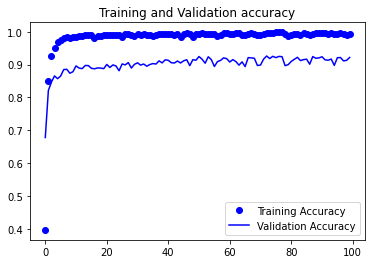

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


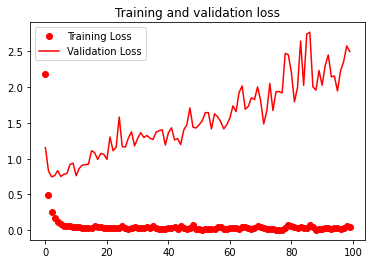

In [22]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Please explain in comment why the validation loss trend is being increasing 

In [23]:
#get the predictions for the test data
predicted_classes = cnn_model.predict(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test
print(predicted_classes.shape)
print(y_true.shape)
predicted_classes=np.argmax(predicted_classes,axis=1)
print(predicted_classes)

 #Read more about argmax: https://machinelearningmastery.com/argmax-in-machine-learning/

(4410, 43)
(4410,)
[32  9 41 ... 25 25 25]


<AxesSubplot:>

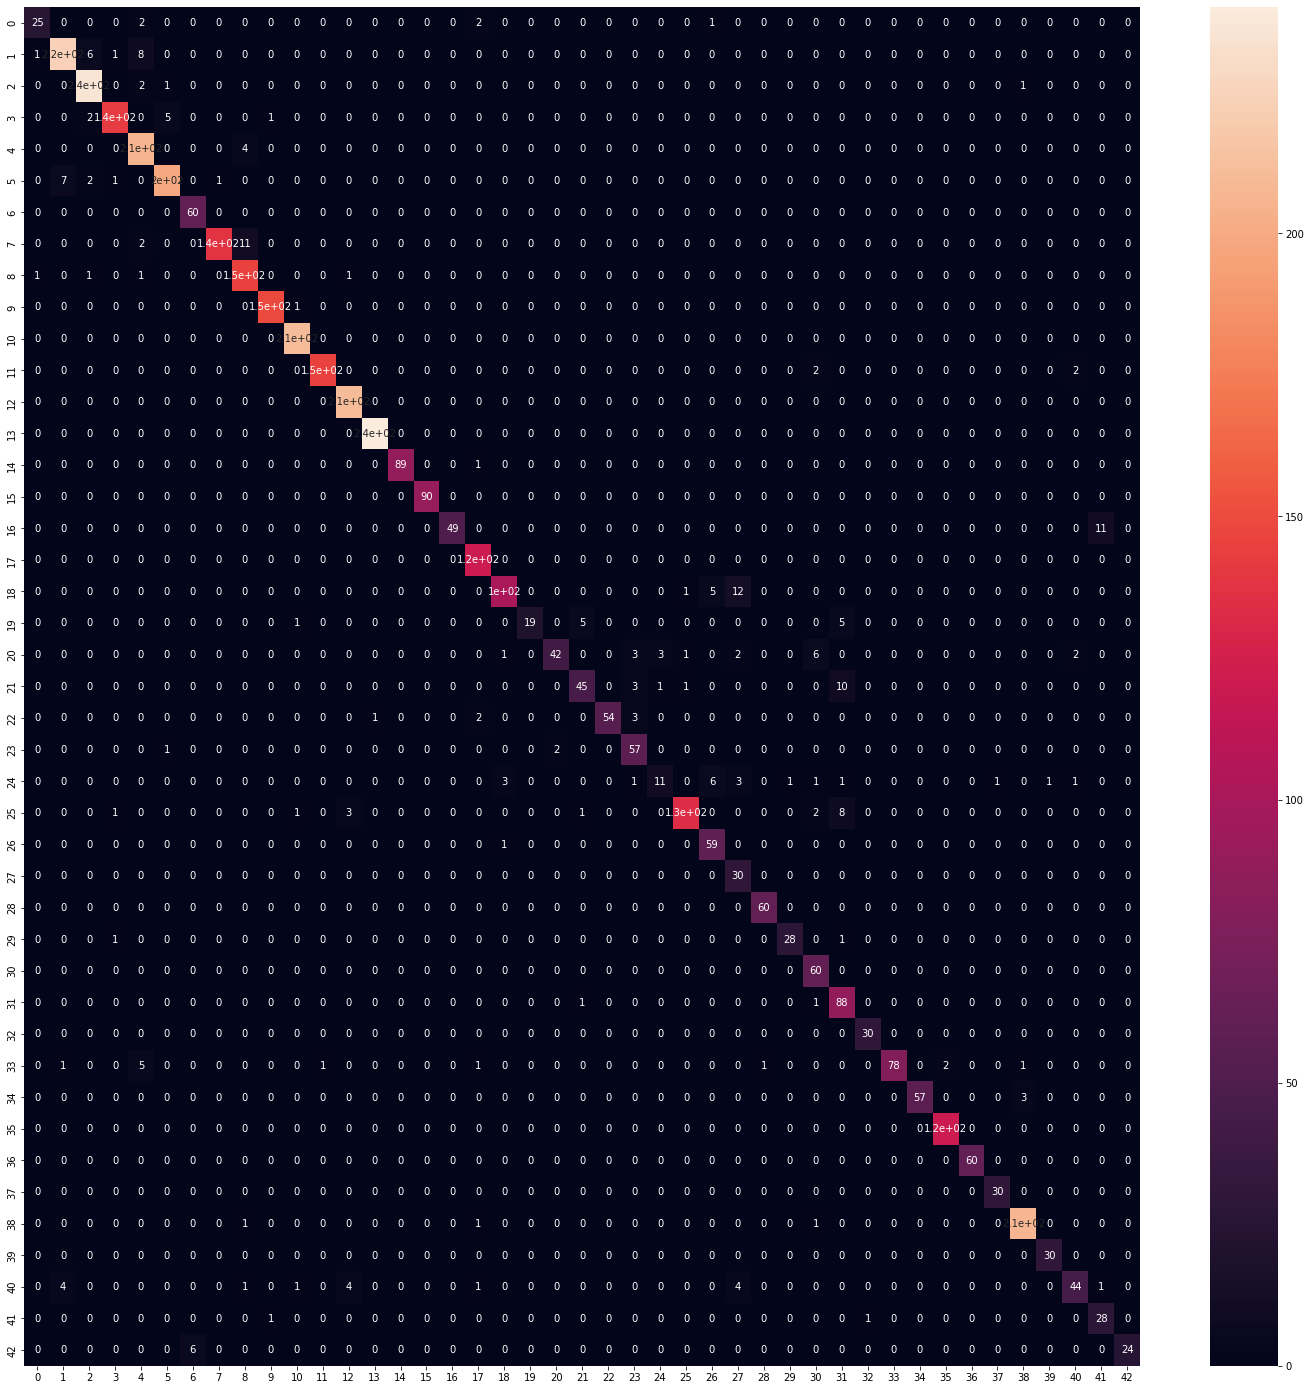

In [24]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import multilabel_confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

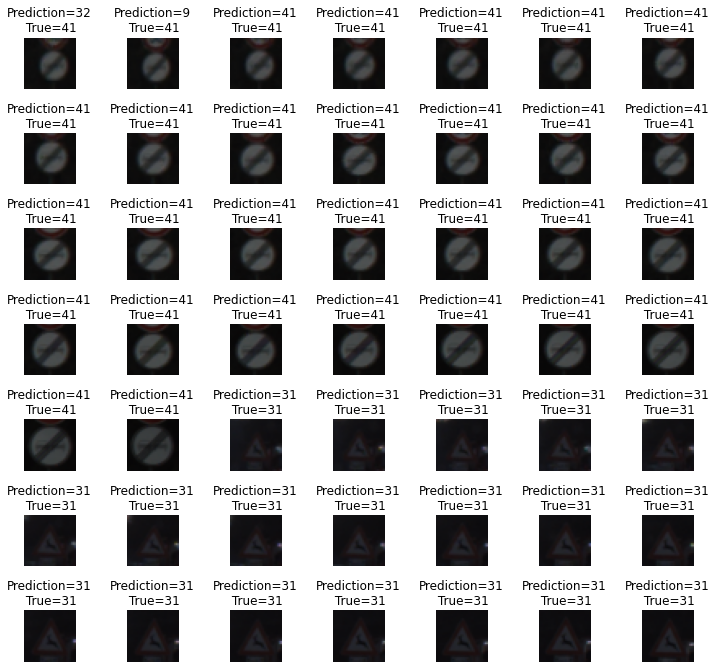

In [25]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# GREAT JOB! NOW YOU'VE MASTERED CNNS TRAINING USING KERAS!